In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

from utils import *
from plot_utils import *
from AnalyseDefects import AnalyseDefects

In [ ]:
LL = 2048
output_path = f'data\\na{LL}'
mode = 'all' # 'all' or 'short'

defect_list = gen_analysis_dict(LL, mode)

ad = AnalyseDefects(defect_list, output_path=output_path)

extract = False
analyze = False
merge = False

if extract:
    ad.extract_results()
if analyze:
    ad.analyze_defects()
if merge:
    ad.merge_results()

In [37]:
ad.conv_list, len(ad.conv_list[0]), len(ad.conv_list[1]),

([array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([  0, 250,   0,   0,   0, 100,   0])],
 10,
 7)

In [38]:
ad.output_merged

'data\\na2048\\merged_results'

In [39]:
conv_list_merged = np.ones_like(ad.act_list_merged)
actidx=0
for i, conv in enumerate(reversed(ad.conv_list)):
    conv_list_merged[actidx:actidx+len(conv)] = conv
    actidx += len(conv)
# save to merged

np.save(os.path.join(ad.output_merged, 'conv_list.npy'), conv_list_merged)

In [35]:
conv_list_merged

array([   0., 1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])

In [22]:
ad.conv_list

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0]),
 array([  0,   0, 750, 750, 750,   0, 750, 750, 500])]

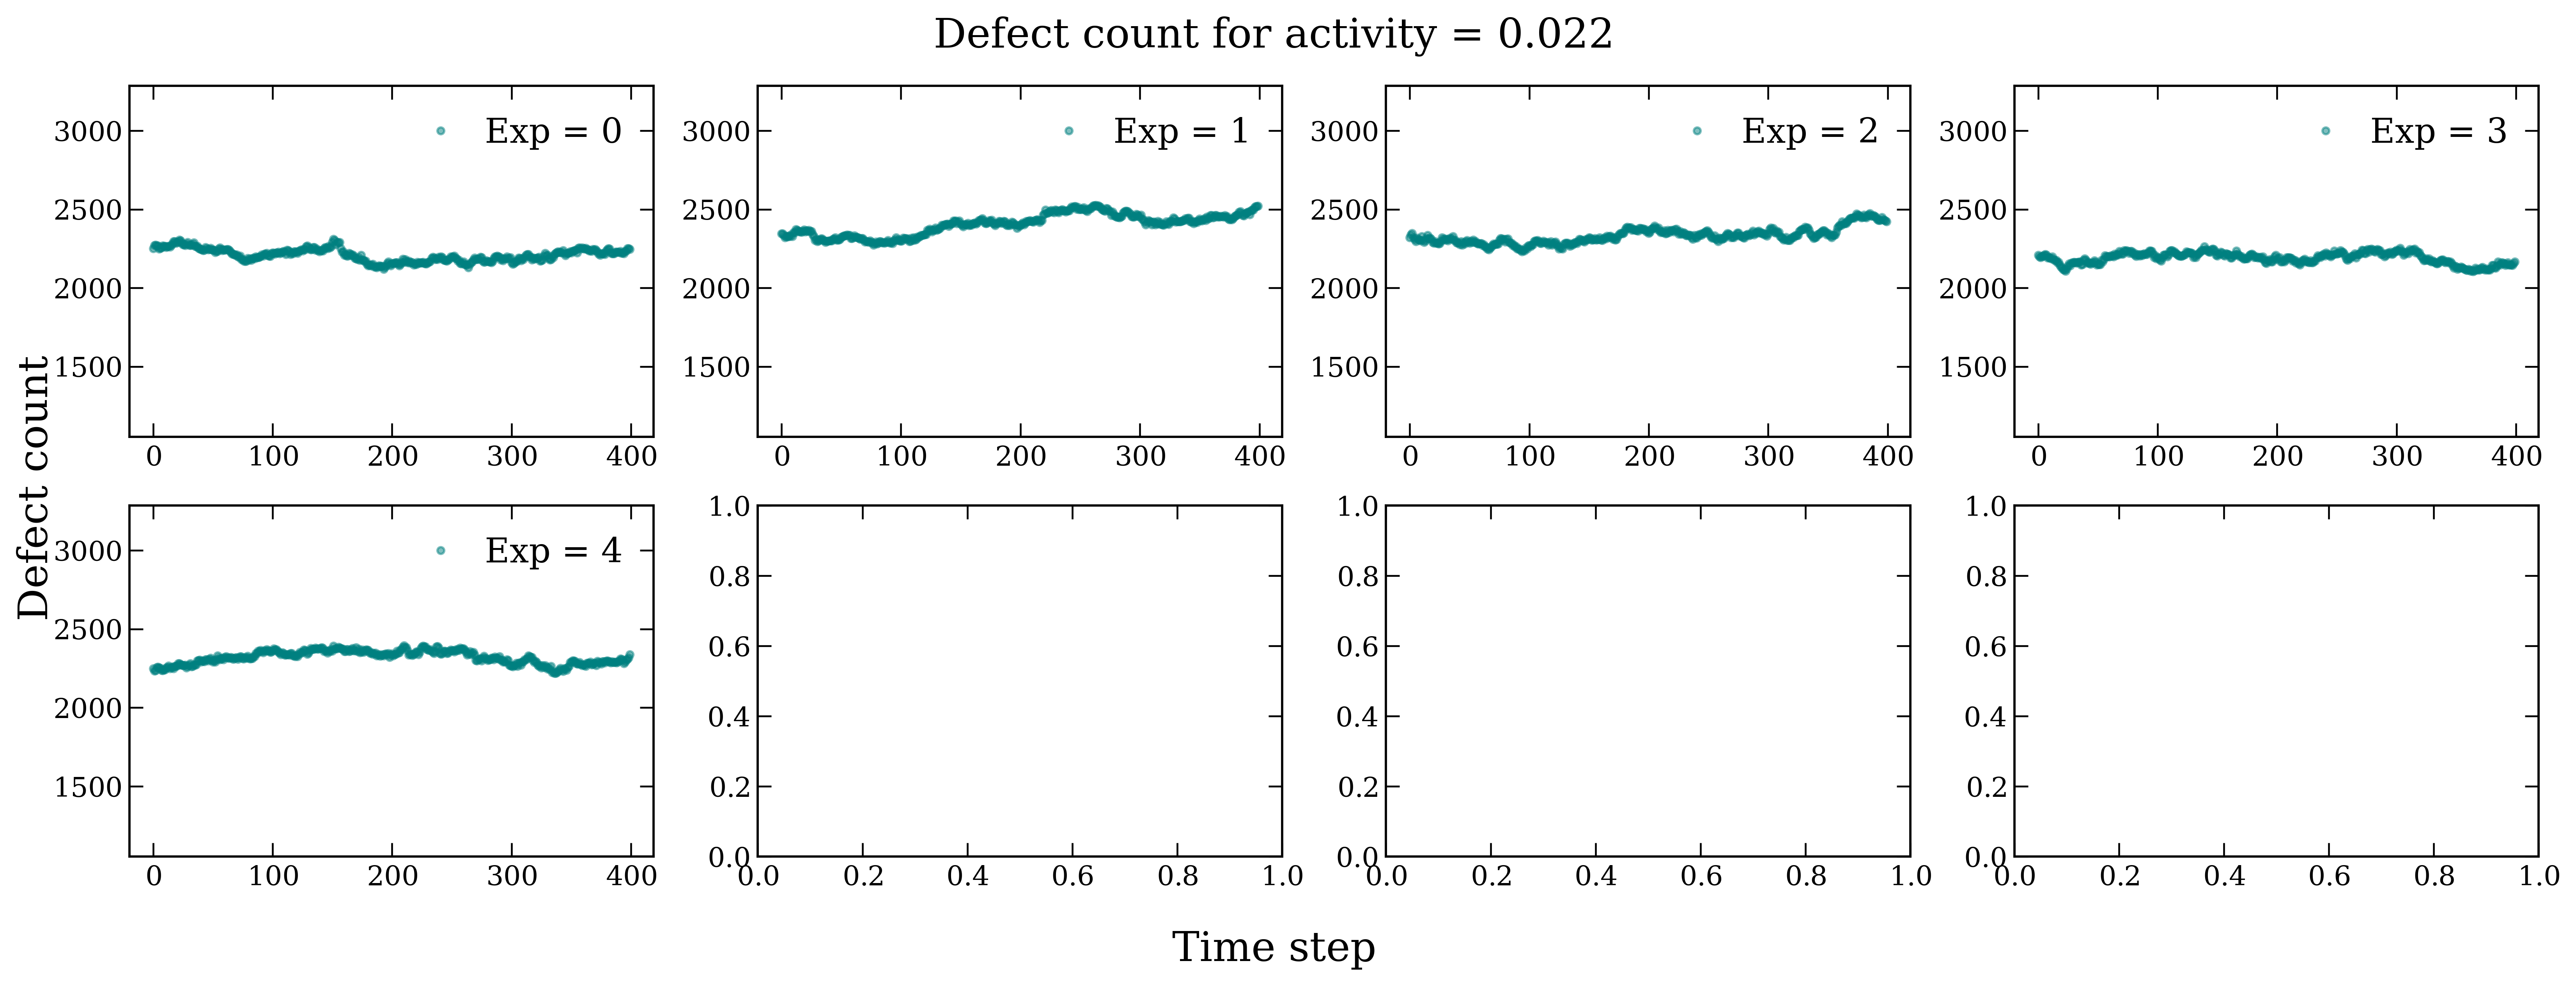

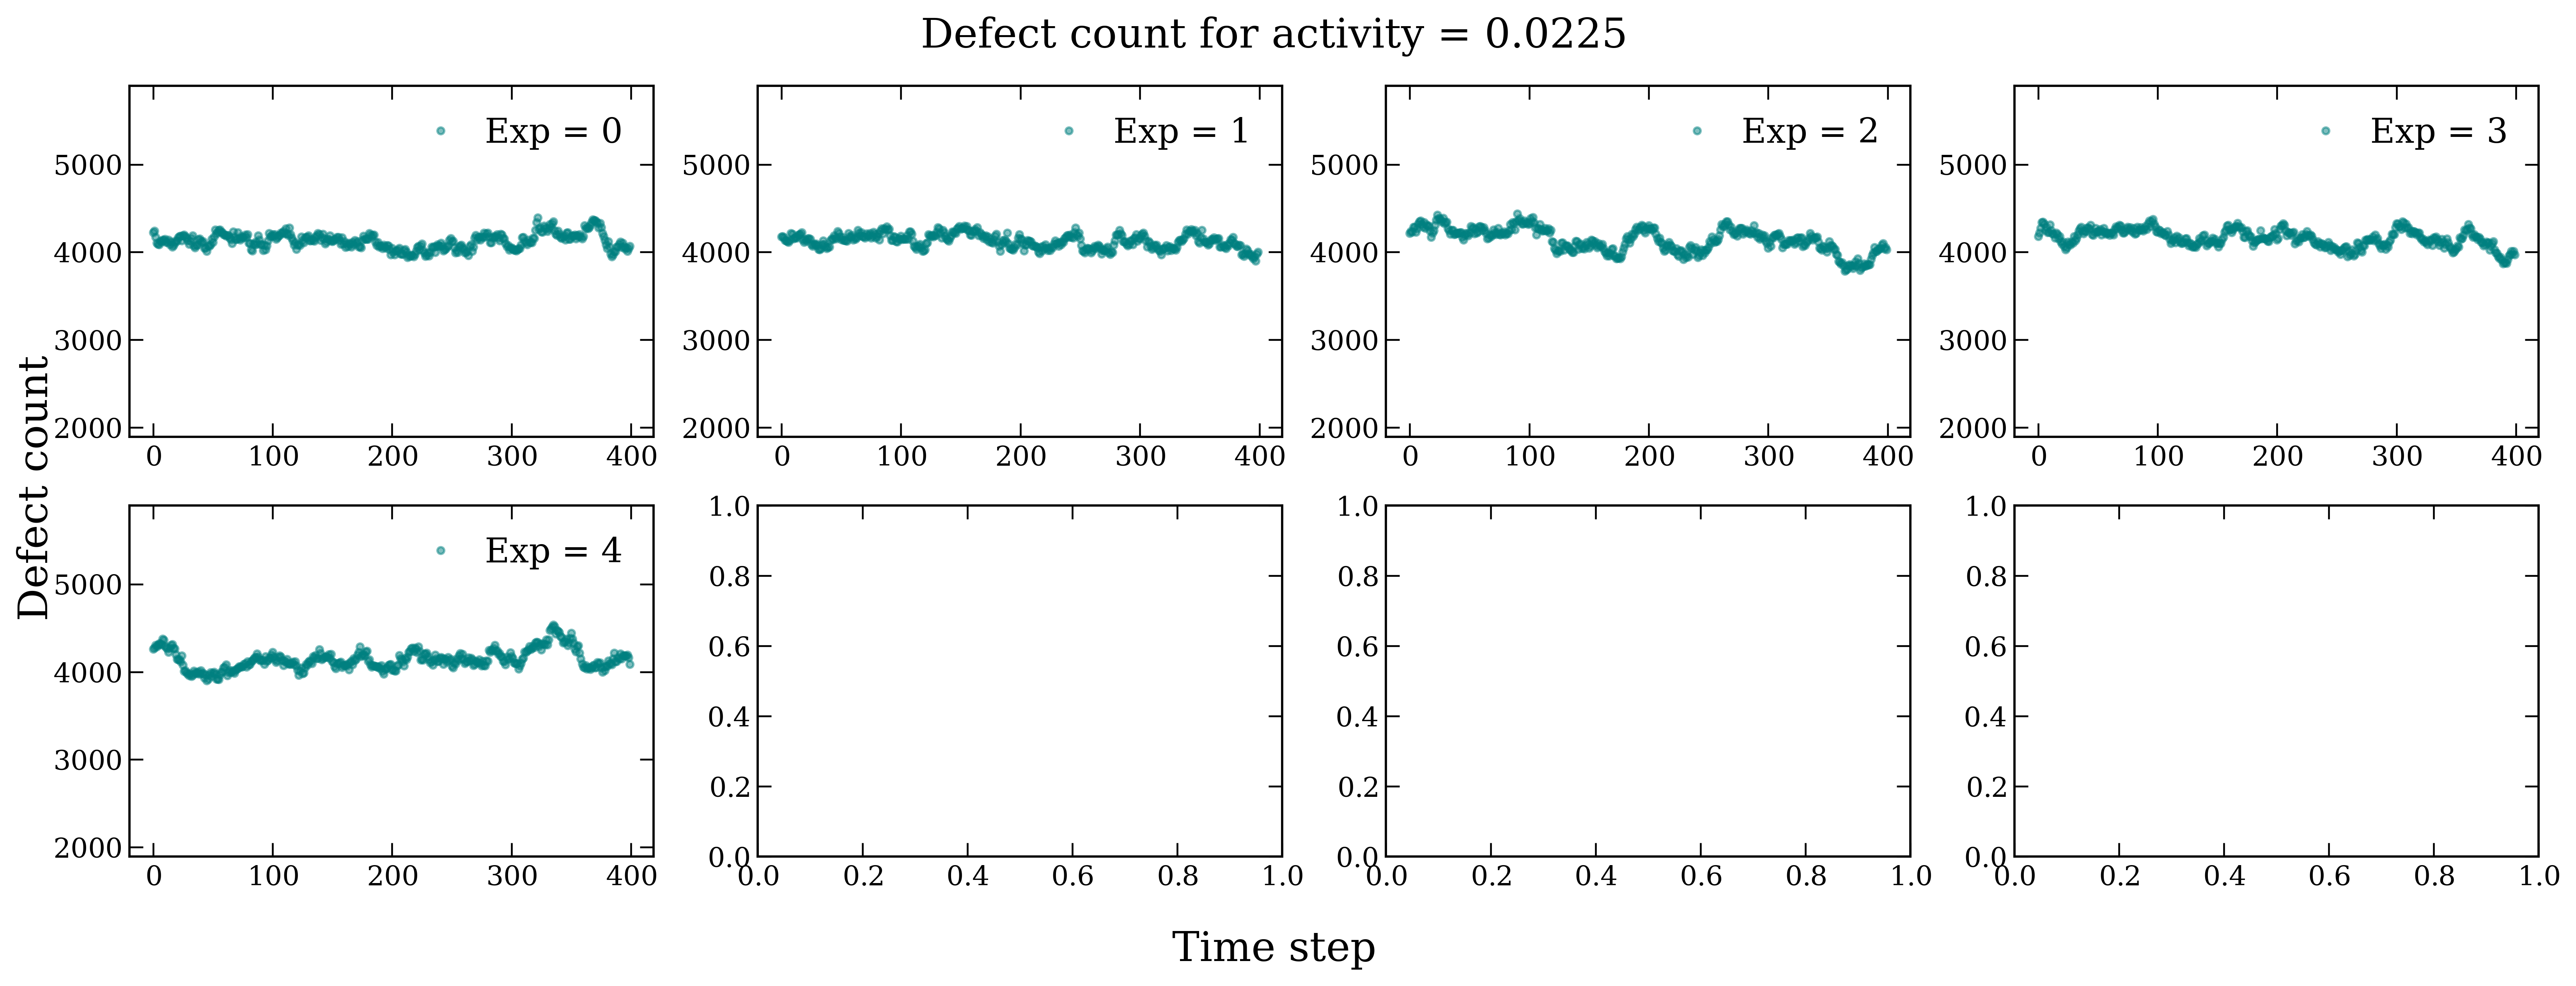

In [8]:
ad.plot_defects_per_exp(-1, act_idx_bounds=[-2,None])

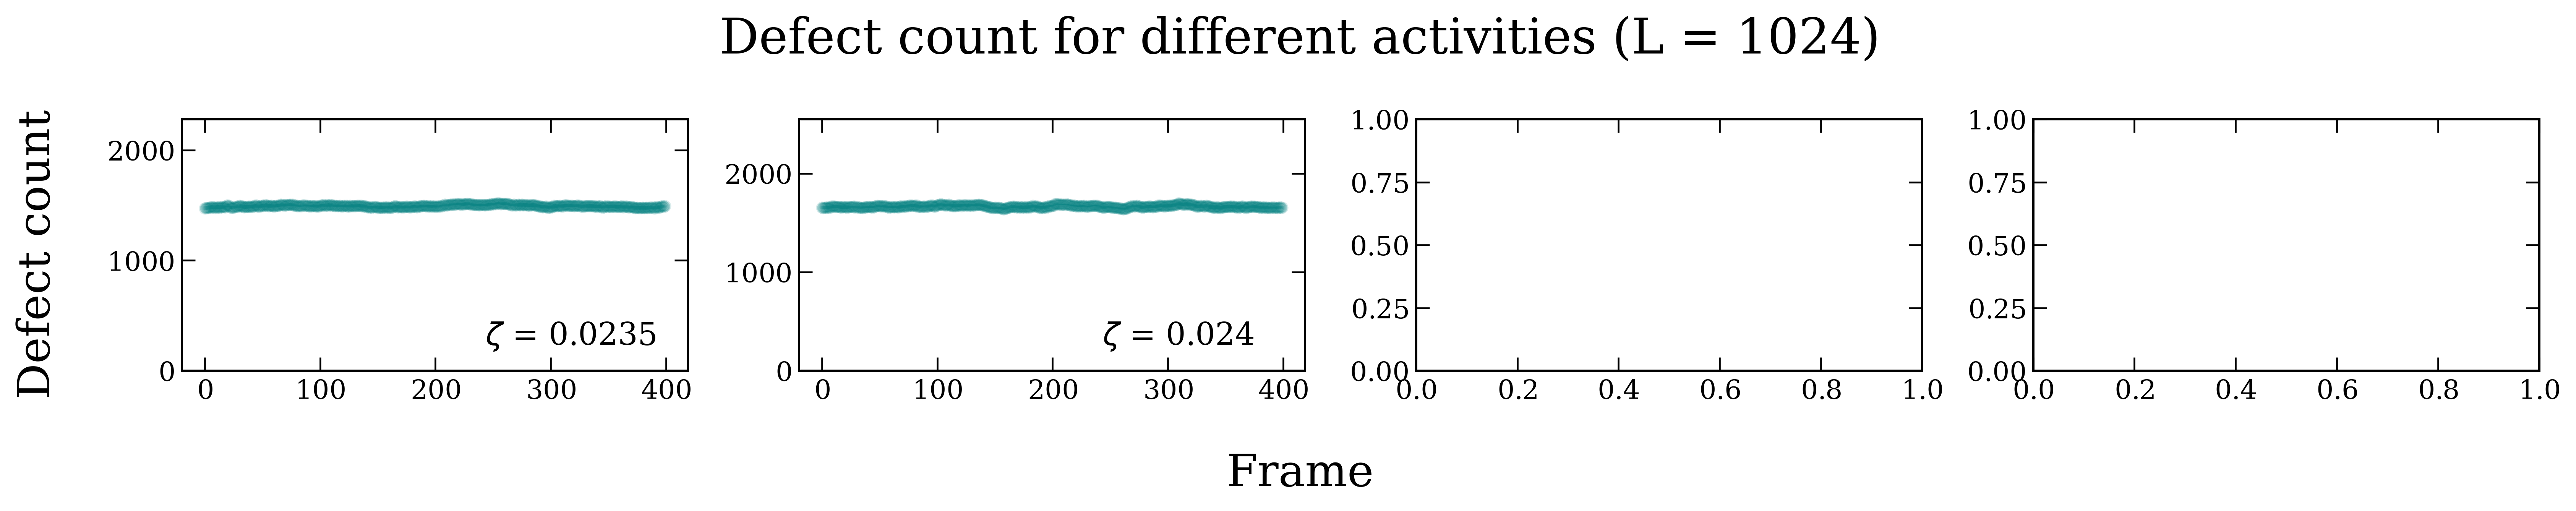

(<Figure size 6720x1260 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

In [11]:
ad.plot_defects_per_activity(-2)

In [ ]:
for Ndataset in range(ad.Ndata):
    ad.plot_defects_per_activity(Ndataset=Ndataset, save=True)
ad.plot_defects_per_activity(use_merged=True, save=True)

In [ ]:
for Ndataset in range(ad.Ndata):
    ad.plot_hyperuniformity_sfac(Ndataset=Ndataset, weighted=False, save = True);